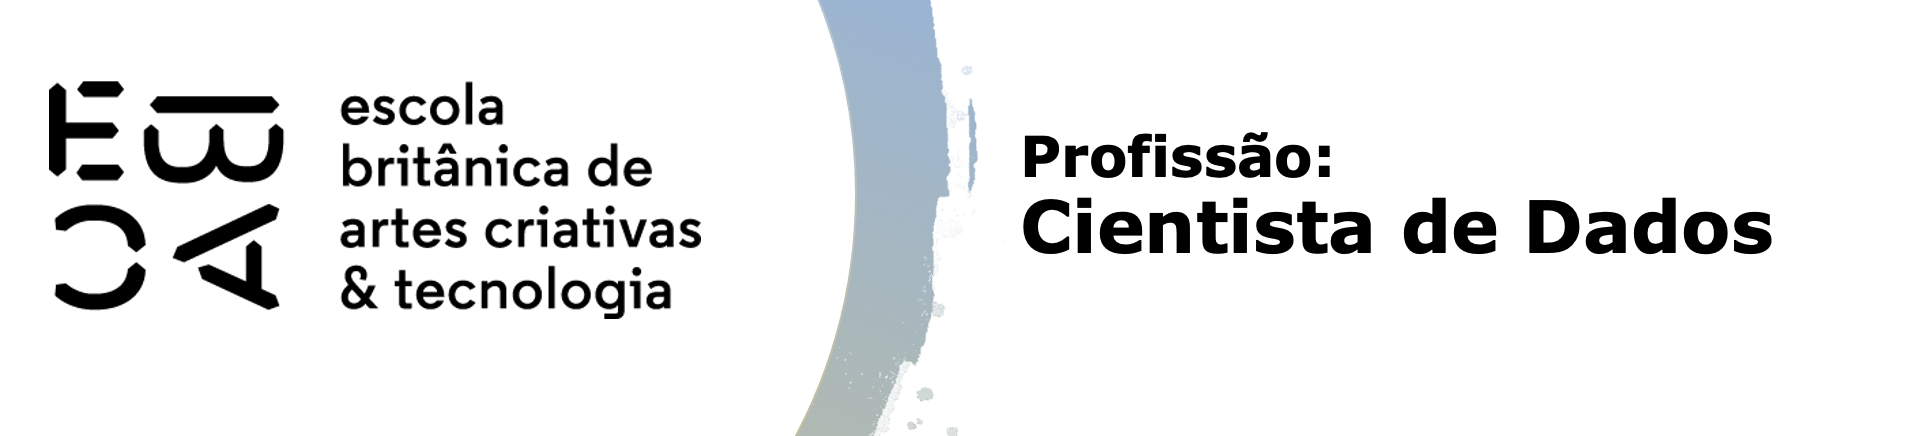

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -p numpy,pandas,matplotlib,seaborn,sklearn

numpy     : 1.21.5
pandas    : 1.4.4
matplotlib: 3.5.2
seaborn   : 0.11.2
sklearn   : 1.0.2



In [4]:
# Treino
X_train = pd.read_csv('X_train_edit.csv', index_col = [0,1])
X_train.head()

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [5]:
# Treino
y_train = pd.read_csv('y_train_edit.csv', index_col = [0,1])
y_train.head()

,,0
,Subject,
0,1,5
1,1,5
2,1,5
3,1,5
4,1,5


In [6]:
# Teste
X_test = pd.read_csv('X_test_edit.csv', index_col = [0,1])
X_test.head()

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [7]:
# Teste
y_test = pd.read_csv('y_test_edit.csv', index_col = [0,1])
y_test.head()

,,0
,Subject,
0,2,5
1,2,5
2,2,5
3,2,5
4,2,5


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [8]:
X_train_cut = X_train[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]
X_test_cut = X_test[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]

In [9]:
path = DecisionTreeClassifier(random_state=100, min_samples_leaf=20).cost_complexity_pruning_path(X_train_cut, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0]) #garantindo que os ccp_alphas são únicos e positivos
ccp_alphas

array([0.00000000e+00, 6.59906426e-06, 6.80087051e-06, 8.99098135e-06,
       9.35119695e-06, 9.89217529e-06, 1.08258755e-05, 1.10353748e-05,
       1.75427739e-05, 2.38241675e-05, 3.18341304e-05, 3.69307877e-05,
       4.07553476e-05, 4.18602847e-05, 5.26532445e-05, 5.55018995e-05,
       5.87197700e-05, 6.41224934e-05, 7.20748845e-05, 7.29725943e-05,
       7.34494015e-05, 8.56481444e-05, 8.61634436e-05, 8.84113166e-05,
       8.89002681e-05, 9.39016923e-05, 9.85135044e-05, 9.93339269e-05,
       1.08353426e-04, 1.12003796e-04, 1.12102261e-04, 1.16839113e-04,
       1.22582202e-04, 1.47025120e-04, 1.47143607e-04, 1.50665439e-04,
       1.53540577e-04, 1.74596286e-04, 2.11065827e-04, 2.20689051e-04,
       2.27768134e-04, 2.38088595e-04, 2.49550310e-04, 2.85636561e-04,
       2.88026156e-04, 2.89776222e-04, 2.97189102e-04, 3.50665838e-04,
       3.60123931e-04, 3.62028531e-04, 3.66010486e-04, 4.35255713e-04,
       4.35809630e-04, 4.43756801e-04, 4.45010651e-04, 4.49597283e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [10]:
clf = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).fit(X_train_cut, y_train)

In [11]:
grid_parameters = {'ccp_alpha': ccp_alphas[::5]}
grid_parameters

{'ccp_alpha': array([0.00000000e+00, 9.89217529e-06, 3.18341304e-05, 5.55018995e-05,
        7.34494015e-05, 9.39016923e-05, 1.12102261e-04, 1.50665439e-04,
        2.27768134e-04, 2.89776222e-04, 3.66010486e-04, 4.49597283e-04,
        5.50766401e-04, 6.21251573e-04, 8.89427640e-04, 1.06036006e-03,
        1.42753784e-03, 1.62275834e-03, 2.16385984e-03, 4.38907334e-03,
        1.03430703e-02, 1.86138242e-01])}

In [12]:
%%time
grid = GridSearchCV(estimator=clf, param_grid=grid_parameters, cv=10)
grid.fit(X_train_cut, y_train)

Wall time: 8.92 s


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=100),
             param_grid={'ccp_alpha': array([0.00000000e+00, 9.89217529e-06, 3.18341304e-05, 5.55018995e-05,
       7.34494015e-05, 9.39016923e-05, 1.12102261e-04, 1.50665439e-04,
       2.27768134e-04, 2.89776222e-04, 3.66010486e-04, 4.49597283e-04,
       5.50766401e-04, 6.21251573e-04, 8.89427640e-04, 1.06036006e-03,
       1.42753784e-03, 1.62275834e-03, 2.16385984e-03, 4.38907334e-03,
       1.03430703e-02, 1.86138242e-01])})

In [13]:
results = pd.DataFrame(grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028382,0.004961,0.002599,0.000800,0.0,{'ccp_alpha': 0.0},0.739130,0.797554,0.808163,0.727891,0.783673,0.717007,0.764626,0.697959,0.854422,0.790476,0.768090,0.045459,18
1,0.031680,0.006953,0.003827,0.001615,0.00001,{'ccp_alpha': 9.892175289345545e-06},0.739130,0.797554,0.808163,0.727891,0.783673,0.717007,0.764626,0.697959,0.854422,0.790476,0.768090,0.045459,18
2,0.029381,0.005349,0.003198,0.001326,0.000032,{'ccp_alpha': 3.183413042732075e-05},0.739130,0.797554,0.808163,0.727891,0.783673,0.717007,0.764626,0.697959,0.854422,0.790476,0.768090,0.045459,18
3,0.026983,0.002791,0.002899,0.000539,0.000056,{'ccp_alpha': 5.550189952419353e-05},0.748641,0.797554,0.808163,0.727891,0.783673,0.717007,0.764626,0.697959,0.854422,0.790476,0.769041,0.044940,12
4,0.025684,0.002325,0.003130,0.001789,0.000073,{'ccp_alpha': 7.344940152339511e-05},0.748641,0.797554,0.808163,0.727891,0.783673,0.717007,0.764626,0.697959,0.854422,0.790476,0.769041,0.044940,12


In [14]:
grid.best_score_

0.8023593241644484

In [15]:
grid.best_index_

19

In [16]:
grid.best_params_

{'ccp_alpha': 0.004389073344928773}

In [17]:
best_ccp = results.iloc[grid.best_index_,4]
best_ccp

0.004389073344928773

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [18]:
clf = DecisionTreeClassifier(random_state=100, ccp_alpha=best_ccp).fit(X_train_cut, y_train)

In [19]:
clf.score(X_test_cut, y_test)

0.7376993552765524

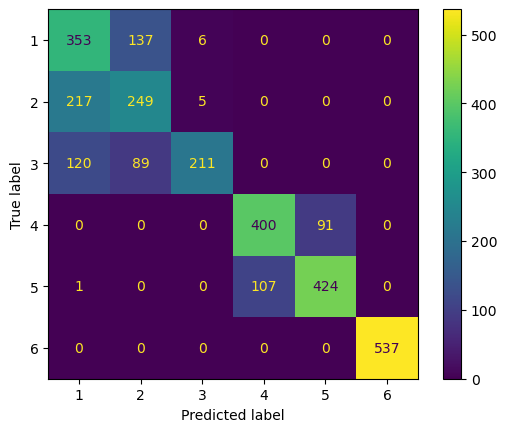

In [20]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_cut, y_test);

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Faça uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [21]:
# Classe 2
y_train_dummies = pd.get_dummies(y_train['0'])
y_train_cut = y_train_dummies[2].to_frame()
y_train_cut.head()

,,2
,Subject,
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [22]:
clf = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20, max_depth = 4).fit(X_train, y_train_cut)

In [23]:
importances = pd.Series(clf.feature_importances_, index = X_train.columns)
importances.sort_values(ascending = False, inplace = True)
importances.head(3)

74 tGravityAcc-arCoeff()-Z,1      0.336087
331 fBodyAcc-bandsEnergy()-1,8    0.308642
440 fBodyGyro-energy()-X          0.066982
dtype: float64

In [24]:
X_train_cut = X_train[['74 tGravityAcc-arCoeff()-Z,1','331 fBodyAcc-bandsEnergy()-1,8','440 fBodyGyro-energy()-X']]
X_test_cut = X_test[['74 tGravityAcc-arCoeff()-Z,1','331 fBodyAcc-bandsEnergy()-1,8','440 fBodyGyro-energy()-X']]

In [25]:
path = DecisionTreeClassifier(random_state=100, min_samples_leaf=20).cost_complexity_pruning_path(X_train_cut, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

array([0.00000000e+00, 6.26536890e-06, 7.68794058e-06, 8.26772494e-06,
       9.97344437e-06, 1.62755875e-05, 2.07470146e-05, 2.85462788e-05,
       3.05715322e-05, 3.24166929e-05, 3.74826031e-05, 4.02752851e-05,
       4.34459928e-05, 4.62738549e-05, 4.84884134e-05, 5.09274489e-05,
       5.11378301e-05, 5.88072250e-05, 6.12078346e-05, 6.22971515e-05,
       6.65955372e-05, 6.85854055e-05, 6.95695110e-05, 7.19893734e-05,
       7.21725034e-05, 7.25584164e-05, 7.31946532e-05, 7.84100365e-05,
       7.88129249e-05, 7.93059746e-05, 8.08880966e-05, 8.10854901e-05,
       8.21992661e-05, 8.53544794e-05, 8.78297929e-05, 8.84113166e-05,
       8.84113166e-05, 8.91384798e-05, 9.04427455e-05, 9.47032840e-05,
       9.79109453e-05, 9.89670749e-05, 9.99969893e-05, 1.02811645e-04,
       1.05553741e-04, 1.05680132e-04, 1.06544679e-04, 1.12362208e-04,
       1.13288960e-04, 1.21944613e-04, 1.22595984e-04, 1.30608850e-04,
       1.31250988e-04, 1.35276796e-04, 1.39401069e-04, 1.40508874e-04,
      

In [26]:
clf = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).fit(X_train_cut, y_train)

In [27]:
grid_parameters = {'ccp_alpha':ccp_alphas[::5]}
grid_parameters

{'ccp_alpha': array([0.00000000e+00, 1.62755875e-05, 3.74826031e-05, 5.09274489e-05,
        6.65955372e-05, 7.25584164e-05, 8.08880966e-05, 8.84113166e-05,
        9.79109453e-05, 1.05680132e-04, 1.22595984e-04, 1.40508874e-04,
        1.49619151e-04, 1.58197632e-04, 1.64487874e-04, 1.66769461e-04,
        1.80614059e-04, 1.93388893e-04, 2.01836332e-04, 2.25247000e-04,
        2.37164483e-04, 2.47832804e-04, 2.62166891e-04, 2.81973821e-04,
        2.95384881e-04, 3.22370026e-04, 3.35446980e-04, 3.51825864e-04,
        3.81021971e-04, 4.12807753e-04, 4.40802897e-04, 4.68711990e-04,
        5.64016987e-04, 6.55804069e-04, 7.30446294e-04, 7.83993280e-04,
        9.00399367e-04, 1.11381666e-03, 1.46487641e-03, 2.47465690e-03,
        3.58993200e-03, 1.15097969e-02])}

In [28]:
%%time

grid = GridSearchCV(estimator = clf, param_grid=grid_parameters,cv=10)
grid.fit(X_train_cut, y_train)

Wall time: 17.5 s


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=100),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.62755875e-05, 3.74826031e-05, 5.09274489e-05,
       6.65955372e-05, 7.25584164e-05, 8.08880966e-05, 8.84113166e-05,
       9.79109453e-05, 1.05680132e-04, 1.22595984e-04, 1.40508874e-04,
       1.49619151e-04, 1.58197632e-04, 1.64487874e-04, 1.66...
       1.80614059e-04, 1.93388893e-04, 2.01836332e-04, 2.25247000e-04,
       2.37164483e-04, 2.47832804e-04, 2.62166891e-04, 2.81973821e-04,
       2.95384881e-04, 3.22370026e-04, 3.35446980e-04, 3.51825864e-04,
       3.81021971e-04, 4.12807753e-04, 4.40802897e-04, 4.68711990e-04,
       5.64016987e-04, 6.55804069e-04, 7.30446294e-04, 7.83993280e-04,
       9.00399367e-04, 1.11381666e-03, 1.46487641e-03, 2.47465690e-03,
       3.58993200e-03, 1.15097969e-02])})

In [29]:
results = pd.DataFrame(grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039493,0.005867,0.003205,0.000607,0.0,{'ccp_alpha': 0.0},0.557065,0.444293,0.512925,0.522449,0.52517,0.495238,0.571429,0.623129,0.598639,0.610884,0.546122,0.053574,32
1,0.042718,0.007503,0.003398,0.000916,0.000016,{'ccp_alpha': 1.6275587548709937e-05},0.557065,0.444293,0.512925,0.522449,0.52517,0.495238,0.571429,0.623129,0.598639,0.610884,0.546122,0.053574,32
2,0.038376,0.006066,0.002998,0.000774,0.000037,{'ccp_alpha': 3.748260312197308e-05},0.557065,0.444293,0.512925,0.521088,0.52517,0.495238,0.571429,0.623129,0.598639,0.610884,0.545986,0.053636,35
3,0.044903,0.005392,0.003598,0.000663,0.000051,{'ccp_alpha': 5.092744894602281e-05},0.557065,0.444293,0.512925,0.521088,0.52517,0.495238,0.571429,0.623129,0.598639,0.610884,0.545986,0.053636,35
4,0.039375,0.007265,0.003298,0.000780,0.000067,{'ccp_alpha': 6.65955372157771e-05},0.557065,0.444293,0.512925,0.521088,0.52517,0.492517,0.571429,0.621769,0.597279,0.610884,0.545442,0.053572,38


In [30]:
grid.best_score_

0.5944036527654541

In [31]:
best_ccp = results.iloc[grid.best_index_,4]
best_ccp

0.002474656903782596

In [32]:
clf = DecisionTreeClassifier(random_state=100, ccp_alpha=best_ccp).fit(X_train_cut, y_train)

In [33]:
clf.score(X_test_cut, y_test)

0.5839837122497455

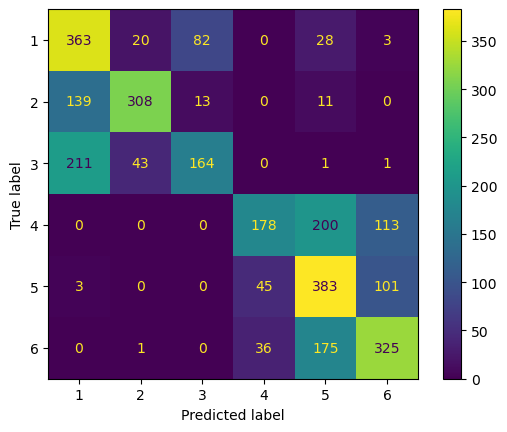

In [34]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_cut, y_test);

### Acurácia da classe 2 do modelo 1

In [35]:
acuracia_1 =  249/(217+249+5)
print(f"{acuracia_1*100:.2f}%")

52.87%


### Acurácia da classe 2 do modelo 2

In [36]:
acuracia_2 = 308/(139+308+13+11)
print(f"{acuracia_2*100:.2f}%")

65.39%


### Conclusão

Apesar do modelo anterior possuir acurácia geral maior do que o modelo atual, se desejarmos um modelo apenas para a classe 2 este último acaba sendo melhor que o anterior.